### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features

In [2]:
df = pd.read_csv("BankCustomer.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Cleaning the dataset

In [4]:
#we dont need row number therfore we drop it

In [5]:
constant_features = get_constant_features(df)
constant_features.head()

,Desc,Var,Value,Perc


In [6]:
#no constant features

In [7]:
constant_features = get_constant_features(df, threshold=0.50, dropna=False)
constant_features

,Desc,Var,Value,Perc
0,Quasi Constant,Exited,0,79.63
1,Quasi Constant,HasCrCard,1,70.55
2,Quasi Constant,Gender,Male,54.57
3,Quasi Constant,IsActiveMember,1,51.51
4,Quasi Constant,NumOfProducts,1,50.84
5,Quasi Constant,Geography,France,50.14


In [8]:
#Exited and Has crCard are noteworthy quasi constant features, not dropping them for future use

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df=df.drop(["RowNumber","CustomerId"], axis=1)

In [11]:
#surname serves no purpose in prediction 

In [12]:
df=df.drop("Surname", axis=1)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
#therfore the dataset has no null values

In [16]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Exploratory Data Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

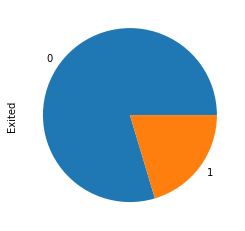

In [18]:
df.Exited.value_counts().plot(kind='pie')
plt.show()

In [19]:
#less than 20% people exited the bank 

<AxesSubplot:xlabel='Geography', ylabel='count'>

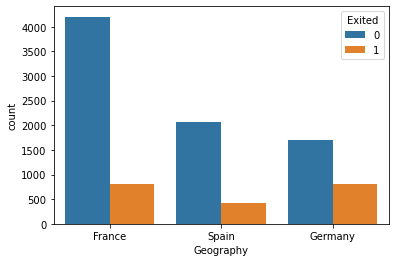

In [20]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

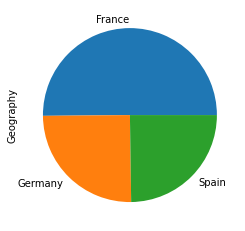

In [21]:
df.Geography.value_counts().plot(kind='pie')
plt.show()

In [22]:
#we can see that germans have a higher chance of exiting the bank and germans consist of 25% of bank population

<AxesSubplot:xlabel='Gender', ylabel='count'>

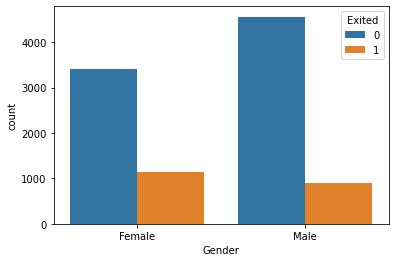

In [23]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

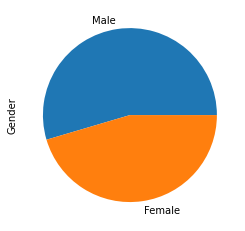

In [24]:
df.Gender.value_counts().plot(kind='pie')
plt.show()

In [25]:
#we can see that women have a higher chance of exiting the bank and the male percentage is higher

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

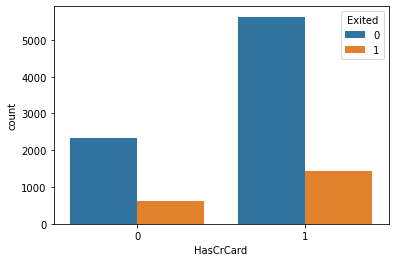

In [26]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

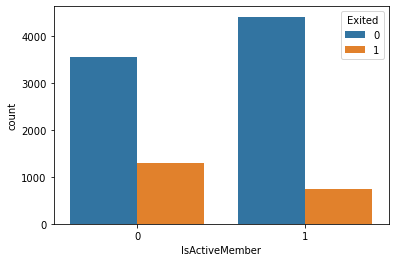

In [27]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

In [28]:
#active members do not tend to exit the bank

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

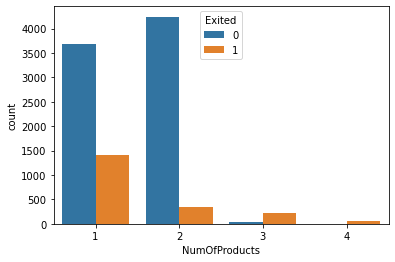

In [29]:
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df)

In [30]:
# 3 or 4 products more likely means that the customer will exit the bank

<AxesSubplot:xlabel='EstimatedSalary'>

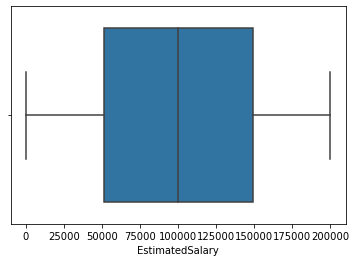

In [31]:
sns.boxplot(x=df['EstimatedSalary'])

<AxesSubplot:xlabel='Balance'>

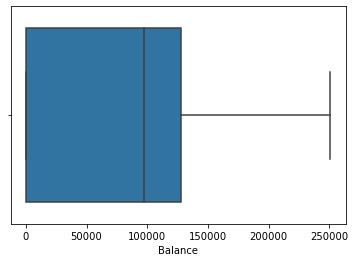

In [32]:
sns.boxplot(x=df['Balance'])

In [33]:
#no outliers as such for the balance and estimated salary -->but balance biased towards 0 noted.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

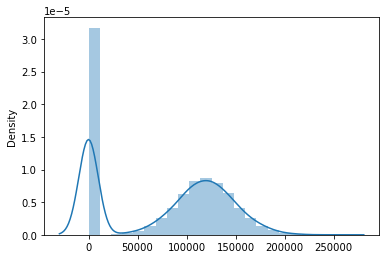

In [34]:
plt.figure()
sns.distplot(x=df['Balance'])

In [35]:
#many accounts hold 0 balance

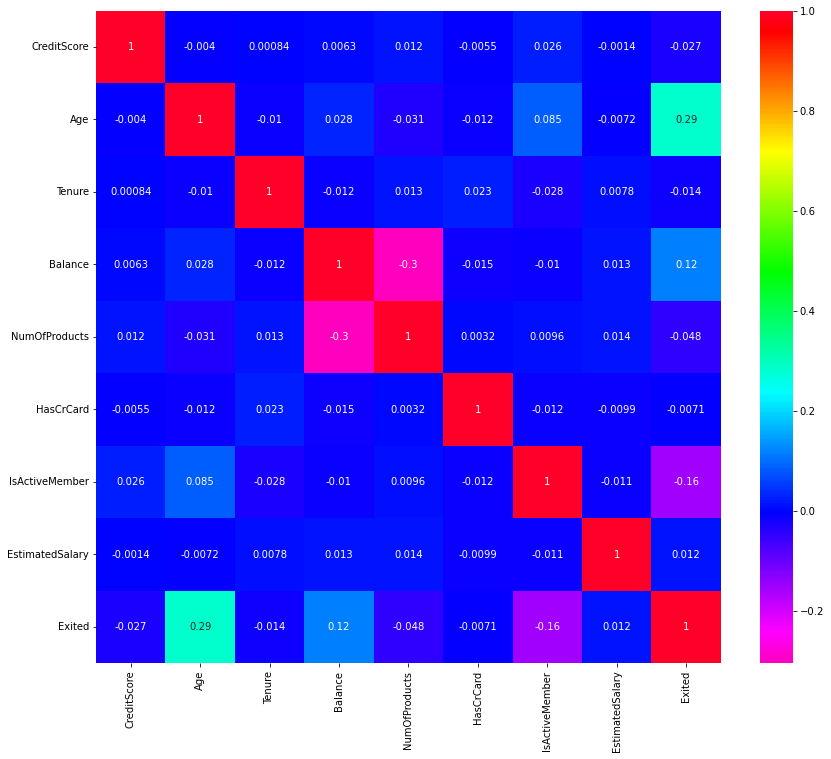

In [36]:
plt.figure(figsize=(14,12))
dataplot=sns.heatmap(df.corr(), cmap="gist_rainbow_r", annot=True)
plt.show()

In [37]:
#we can see that age, balance activity are the most correlated features with our target feature

In [38]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Lable Encoding

In [39]:
df['Geography'] = df['Geography'].str.replace('France',"1").str.replace('Spain',"2").str.replace('Germany',"3").astype(int)

In [40]:
#replacing france as 1 spain as 2 and gerany as 3

In [41]:
df['Gender'] = df['Gender'].str.replace('Female',"0").str.replace('Male',"1").astype(int)

In [42]:
#replacing female as o and male as 1

In [43]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [44]:
#now all the features are in the format of numbers

### Seperating the target column from the rest

In [45]:
df.shape

(10000, 11)

In [46]:
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [47]:
X = df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [48]:
y=df['Exited']

In [49]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64
9996,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,36,7,0.00,1,0,1,42085.58
9998,772,3,1,42,3,75075.31,2,1,0,92888.52


In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Splitting the dataset into train and test in the ratio of 8:2

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [53]:
X_train.shape

(8000, 10)

In [54]:
y_train.shape

(8000,)

In [55]:
X_loc_test.shape

(2000, 10)

In [56]:
y_loc_test.shape

(2000,)

### Splitting the test  set into validate and test in the ratio of 1:1

In [57]:
X_test, X_validate, y_test, y_validate = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=101)

In [58]:
X_test.shape

(1000, 10)

In [59]:
X_validate.shape

(1000, 10)

In [60]:
y_test.shape

(1000,)

In [61]:
y_validate.shape

(1000,)

### model selection based on r2 and mse score

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
#creating lists to store evaluation metrics MSE R2 and  Algrithm for identifing the algorithm column for metrics
MSE_Score = []
R2_Score = []
Algorithm = []
MSE_Score_val = []
R2_Score_val = []
Algorithm_val = []

**Linear Regression**

In [64]:
Algorithm.append('LinearRegression')
lr = LinearRegression()
lr.fit(X_train, y_train)
predictedlr = lr.predict(X_test)

In [65]:
#storing the metrics of test set in their respective lists
MSE_Score.append(mean_squared_error(y_test, predictedlr))
R2_Score.append(r2_score(y_test, predictedlr))

In [66]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[0.14799553605991989],[0.16938568572692259],

**SVG**

In [67]:
Algorithm.append('Support Vector Regression')
sv=SVR()
sv.fit(X_train, y_train)
predictedsv = sv.predict(X_test)

In [68]:
#storing the metrics of test set in their respective lists
MSE_Score.append(mean_squared_error(y_test, predictedsv))
R2_Score.append(r2_score(y_test, predictedsv))

In [69]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[0.14799553605991989, 0.19557826496817882],[0.16938568572692259, -0.09766896197119013],

**Decision Tree Regressor**

In [70]:
#storing the metrics of validate set in their respective lists
Algorithm_val.append('LinearRegression')
MSE_Score_val.append(mean_squared_error(y_validate, predictedlr))
R2_Score_val.append(r2_score(y_validate, predictedlr))

In [71]:
for i in Algorithm_val, MSE_Score_val, R2_Score_val:
    print(i,end=',')

['LinearRegression'],[0.179751434679613],[-0.16329664752951434],